# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

#### importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import requests
import tweepy
from tweepy import OAuthHandler
import json

In [2]:
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open("img_preds.tsv", "wb") as file:
    file.write(r.content)

In [3]:
img_df = pd.read_csv("img_preds.tsv", sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = archive_df.tweet_id.values

with open("supplementary_tweets.txt", "w") as file:
    
    for n, tweet_id in enumerate(tweet_ids):
        
        #Terminal notice after multiples of ten of tweet requests
        if (n+1) % 10 == 0:
            print("remained tweets:", str(len(tweet_ids) - (n+1)))
            
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            
            #Getting specific tweet attributes from the JSON
            id_value = tweet._json.get("id_str")
            ret_count = tweet._json.get("retweet_count")
            fav_count = tweet._json.get("favorite_count")
            
            #Constructing a custom dict with the above attribues
            tweet_custom = {
                       "id_str": id_value,
                       "retweet_count": ret_count,
                       "favorite_count": fav_count
                   }

            json.dump(tweet_custom, file)
            file.write("\n")
        except:
            pass

In [4]:
#Creating a list of parsed json dicts.
frame_dict = []
with open("supplementary_tweets.txt", "r") as file:
    for line in file:
        parsed = json.loads(line)
        frame_dict.append(parsed)

In [5]:
#Convert the list to a Dataframe.
extra_df = pd.DataFrame(frame_dict)

#Rename the first column to match the tweet_id in archive_df
extra_df = extra_df.rename(columns={"id_str":"tweet_id"})

## Assessing Data

### Visual Assessment

In [6]:
archive_df.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
archive_df.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1708,680798457301471234,NaN,NaN,2015-12-26 17:12:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
1378,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yoda. He's a Zimbabwean Rutabaga. Frea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,None,None,None,None
1683,681694085539872773,NaN,NaN,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
1870,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,12,10,None,None,None,None,None
1837,676089483918516224,NaN,NaN,2015-12-13 17:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hello I'ma just snag this here toasted ba...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676089483...,9,10,None,None,None,None,None
292,838083903487373313,NaN,NaN,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,13,10,Daisy,None,None,None,None
2046,671520732782923777,NaN,NaN,2015-12-01 02:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Alejandro. He's an extremely seductive pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671520732...,10,10,Alejandro,None,None,None,None
721,783334639985389568,NaN,NaN,2016-10-04 15:55:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's currently in a predicament....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783334639...,12,10,Dave,None,None,None,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,None,None,None


In [8]:
extra_df.head(25)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7095,34174
1,892177421306343426,5345,29656
2,891815181378084864,3519,22326
3,891689557279858688,7296,37368
4,891327558926688256,7835,35712
5,891087950875897856,2634,18026
6,890971913173991426,1686,10493
7,890729181411237888,15949,57495
8,890609185150312448,3661,24809
9,890240255349198849,6160,28285


In [9]:
img_df.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1395,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.307794,True,fountain,0.142185,False,Chesapeake_Bay_retriever,0.113903,True
1366,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
635,681231109724700672,https://pbs.twimg.com/media/CXQ4EwQWwAEVaUf.jpg,1,Irish_setter,0.406047,True,cocker_spaniel,0.345646,True,Airedale,0.147912,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1525,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
1947,862722525377298433,https://pbs.twimg.com/media/C_kBjuUUIAArs2-.jpg,1,basset,0.393330,True,beagle,0.242034,True,boxer,0.077692,True


### Programmatic Assessment

In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [13]:
extra_df.describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2501.009454,7134.940696
std,4234.203273,11082.055982
min,1.000000,0.000000
25%,502.000000,1237.000000
50%,1164.000000,3081.000000
75%,2891.500000,8711.500000
max,71617.000000,146389.000000


In [14]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues
1. Unnecessary columns in the `archive` such as `source`.

2. 59 `expanded_url` rows in the `archive` have no Tweet URL. Thus, we can't be sure what this data actually is.

3. `expanded_urls` in `archive` has URLs other than a Twitter web address.

4. In the `archive` some ratings are retweets ratings and not the original post. These need to be ruled out.

5. Ideally we want the #1 prediction of a tweet's image and also classified as a dog.

6. Objects identified other than dog breeds in the `image predictions` dataframe like `orange`, `bagel`, and `spatula`.

7. `archive` dataframe has different representations of missing data such as: `None` & `NaN`

8. The `timestamp` column in `archive` is an object, not a datetime.

9. the `tweet_id` column as the primary-foreign key to join the three tables is not of the same type for all three.

### Tidiness issues
1. In the `archive` dataframe, dog stages are **one** variable in **many** columns

2. The three tables should be joined to form one observational unit.

## Cleaning Data

In [16]:
# Make copies of original pieces of data
archive_copy = archive_df.copy()
extra_copy = extra_df.copy()
img_copy = img_df.copy()

## Quality-related cleaning

### Issue #1: Unnecessary columns in the `archive` such as `source`.

#### Define: Drop all columns beyond thses: `tweet_id`  `timestamp` `text` `retweeted_status_id` (to distinguish tweets from re-tweets),  
`expanded_urls` `rating_numerator`  `rating_denominator` `name` and the four `dog stages`.

#### Code

In [17]:
keep = ["tweet_id", "timestamp", "text", "retweeted_status_id", "expanded_urls", 
        "rating_numerator", "rating_denominator", "name", "doggo", "floofer","pupper", "puppo"]

#List comprehension for columns to drop
drop_list = [col for col in list(archive_copy) if col not in keep]

archive_copy = archive_copy.drop(columns=drop_list)

#### Test

In [18]:
list(archive_copy) == keep

True

### Issue #2: 59 `expanded_url` rows in the `archive` have no Tweet URL. Thus, we can't be sure what this data actually is.

#### Define: Drop all rows where there is no `expanded_urls`.

#### Code

In [19]:
#Filtering out rows when expanded_urls is null
archive_copy = archive_copy.loc[~archive_copy.expanded_urls.isnull()]

#### Test

In [20]:
#Checking if any of the urls is still null
archive_copy.loc[archive_copy.expanded_urls.isnull()]

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: `expanded_urls` in `archive` has URLs other than a Twitter web address.

#### Define: Remove rows if `twitter.com` is not part of the URL 

#### Code

In [21]:
#Keeping only the records where the url is Twitter's
archive_copy = archive_copy[archive_copy.expanded_urls.str.contains("twitter.com")]

#### Test

In [22]:
#Inverse of the above code for urls other than Twitter
archive_copy[~archive_copy.expanded_urls.str.contains("twitter.com")]

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: In the `archive` some ratings are retweet ratings and not the original post. These need to be ruled out.

#### Define: remove rows where `retweeted_status_id` is not Null

#### Code

In [23]:
#Ruling out retweets and droping the entire column afterwards
archive_copy = archive_copy.loc[~archive_copy.retweeted_status_id.notnull()]

#### Test

In [24]:
archive_copy.retweeted_status_id.notnull().sum()

0

In [25]:
#Dropping the column since we no longer need it
archive_copy = archive_copy.drop(columns="retweeted_status_id")

### Issue #5: Ideally we would only want the #1 prediction of a tweet's image.

#### Define: Drop columns related to image predictions other than the `p1` category.

#### Code

In [26]:
keep = ["tweet_id", "jpg_url", "img_num", "p1", "p1_conf", "p1_dog"]

drop_list = [col for col in list(img_copy) if col not in keep]

img_copy = img_copy.drop(labels=drop_list, axis=1)

#### Test

In [27]:
list(img_copy) == keep

True

### Issue #6: Objects identified other than dog breeds in the `image predictions` dataframe like `orange`, `bagel`, and `spatula`.

#### Define: Drop rows where `p1_dog` is not `True` and then drop the `p1_dog` column completely since it will be True for all records

#### Code

In [28]:
img_copy = img_copy.loc[~img_copy.p1_dog == False]

#### Test

In [29]:
(img_copy["p1_dog"] == False).any()

False

In [30]:
img_copy = img_copy.drop(columns={"p1_dog"})

### Issue #7: `archive` dataframe has different representations of missing data such as: `None` & `NaN`

#### Define: Standardize missing values to only be NaN

#### Code

In [31]:
archive_copy = archive_copy.replace(["None", None], np.nan)

#### Test

In [32]:
#Looking at records with at least one NaN to see the change
archive_copy.loc[(archive_copy.isnull()).any(axis=1), :]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


### Issue #8: The `timestamp` column in `archive` is an object, not a datetime.


#### Define: Convert the string-like date and time into a datetime object

#### Code

In [33]:
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp)

#### Test

In [34]:
archive_copy.timestamp.dtype

datetime64[ns, UTC]

### Issue #9: the `tweet_id` column as the primary-foreign key to join the three tables is not of the same type for all three.


#### Define: Convert the data type for `Tweet ID` in all datasets to string.

#### Code

In [35]:
archive_copy = archive_copy.astype(dtype={"tweet_id":str})
img_copy = img_copy.astype(dtype={"tweet_id":str})

#### Test

In [36]:
archive_copy.tweet_id.dtype

dtype('O')

In [37]:
img_copy.tweet_id.dtype

dtype('O')

In [38]:
extra_copy.tweet_id.dtype

dtype('O')

## tidy-related cleaning

### Issue #1: In the `archive` dataframe, dog stages are **one** variable in **many** columns

#### Define: Collapse all four of the stage columns into one single column.

#### Code

In [39]:
#Choosing one dog stage for each tweet
collapsed = archive_copy.loc[:, "doggo":"puppo"].bfill(axis=1).iloc[:, 0]

#Slicing off the last four stage columns
archive_copy = archive_copy.loc[:, "tweet_id":"name"]

#Appending the single stage column
archive_copy["stage"] = collapsed

#### Test

In [40]:
archive_copy[archive_copy.stage.notnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32+00:00,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31+00:00,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
...,...,...,...,...,...,...,...,...
1995,672594978741354496,2015-12-04 01:55:13+00:00,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper
2002,672481316919734272,2015-12-03 18:23:34+00:00,Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,pupper
2009,672254177670729728,2015-12-03 03:21:00+00:00,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper
2015,672205392827572224,2015-12-03 00:07:09+00:00,This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,pupper


### Issue #2: The three tables should be joined to form one observational unit.

#### Define: Join all three tables to get all relevant information in one table. And to only get tweets that have predicted dog images.

#### Code

In [41]:
first_two = archive_copy.merge(right=extra_copy, on="tweet_id", how="left")

master_df = first_two.merge(right=img_copy, on="tweet_id", how="inner") #Records with images only

#### Test

In [42]:
#Checking if the new dataframe has all the columns from the individual dataframes
accounted_for = pd.Series(list(archive_copy) + list(extra_copy) + list(img_copy)).drop_duplicates()

(master_df.columns == accounted_for).all()

True

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
master_df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data

In [44]:
df = pd.read_csv("twitter_archive_master.csv")

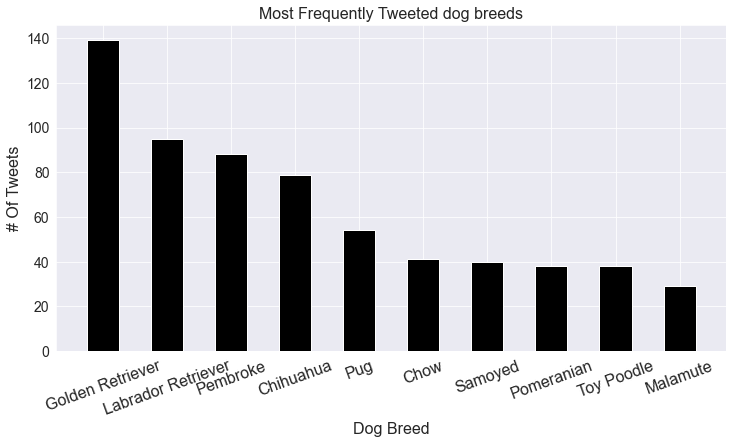

In [45]:
plt.subplots(figsize=(12, 6))

top_ten_breeds = df.p1.value_counts()[:10]
pos = np.arange(len(top_ten_breeds))

plt.bar(pos, top_ten_breeds, width=0.5, color='black')

plt.title("Most Frequently Tweeted dog breeds", fontsize=16)
plt.xlabel("Dog Breed", fontsize=16)
plt.ylabel("# Of Tweets", fontsize=16)

#Customizing the x-labels
labels = list(map(lambda x: x.replace("_", " ").title(), list(top_ten_breeds.index)))

plt.xticks(pos, labels, fontsize=16, rotation=20)
plt.yticks(fontsize=14);

> #### The data used to make the above bar chart was produced by joining image predictions of dogs for each tweet in a dog rating twitter archive

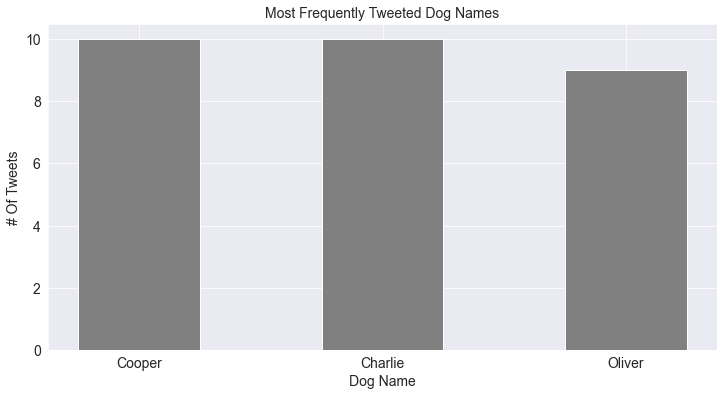

In [46]:
plt.subplots(figsize=(12, 6))

top_three_names = df.name.value_counts()[1:4]
pos = np.arange(len(top_three_names))

plt.bar(top_three_names.index, top_three_names, width=0.5, color="gray")

plt.title("Most Frequently Tweeted Dog Names", fontsize=14)
plt.xlabel("Dog Name", fontsize=14)
plt.ylabel("# Of Tweets", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

> #### The names displayed above were gained from extracting them from the tweets' text bodies in the twitter archive dataset

In [47]:
#Highly retweeted reviews
threshold_ret = df["retweet_count"].quantile(.75)
high_ret = df.query("retweet_count > @threshold_ret")["p1_conf"].mean()

#Highly liked reviews
threshold_fav = df["favorite_count"].quantile(.75)
high_like = df.query("favorite_count > @threshold_fav")["p1_conf"].mean()

high_ret, high_like

(0.6518592, 0.6427686430517712)

In [48]:
print(df.query("retweet_count > @threshold_ret").stage.value_counts())

print("\n")

print(df.query("favorite_count > @threshold_fav").stage.value_counts())

pupper     32
doggo      26
puppo       6
floofer     4
Name: stage, dtype: int64


pupper     29
doggo      29
puppo       9
floofer     3
Name: stage, dtype: int64


> The `Retweet` & `Favorite` counts were gained by being scraped off of a Twitter API  

> The `p1_conf` is the prediction confidence of a tweeted image being the image of a dog and it was gained by merging table of image predictions for each tweet in the `archive`.  

> `stage` was the untidy part of the `archive` dataframe and it represents the "stage" for some dogs in that dataset.

In [49]:
df.groupby("p1")["p1_conf"].mean().sort_values(ascending=False)[:6]

p1
komondor                0.972531
clumber                 0.946718
Brittany_spaniel        0.874545
keeshond                0.844431
bull_mastiff            0.815618
Bernese_mountain_dog    0.801816
Name: p1_conf, dtype: float64

> #### Above is the average prediction confidence for each dog breed we're grouping by. The displayed 6 breeds are the most accurately predicted.

### Insights:
1. Of 111 different dog breeds in the dataset, the following 10 breeds are the most tweeted:
`Golden Retriever` `Labrador Retriever` `Pembroke` `Chihuahua` `Pug` `Chow` `Samoyed` `Toy Poodle` `Pomeranian` `Malamute`


2. `Charlie` `Cooper` And `Oliver` are the top three dog names from a wide assortment of names in the dataset


3. The averge prediction confidence for highly retweeted **or** highly liked dog reviews is approximately 0.65


4. `pupper` and `doggo` are the dog stages associated the most with highly engaged tweets.  


5. The following dog breeds are what the prediction algorithm was able to predict with highest confidence: `komondor` `clumber` `Brittany_spaniel` `Keeshond` `bull_mastiff` `Bernese_mountain_dog`